In [23]:
#Dependencies
import tweepy
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [25]:
# Twitter API Keys
from config import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET
consumer_key = CONSUMER_KEY 
consumer_secret = CONSUMER_SECRET 
access_token = ACCESS_TOKEN 
access_token_secret = ACCESS_TOKEN_SECRET

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:
# Target Search Term
target_terms = ("@BBC", "@CNN", "@CNN", "@FoxNews", "@NYTimes")
# target_user = "@BBC"

# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times (total of 1500 tweets)
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(target, count=5, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    # Store the Average Sentiments
    sentiment = {"User": target,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet Count": len(compound_list)}

In [32]:
# # Convert sentiments to DataFrame
# sentiments_pd = pd.DataFrame.from_dict(sentiment)
# sentiments_pd.head()

{'User': '@NYTimes', 'Compound': 0.17911900000000003, 'Positive': 0.10444000000000001, 'Neutral': 0.055129999999999992, 'Negative': 0.84042000000000006, 'Tweet Count': 100}


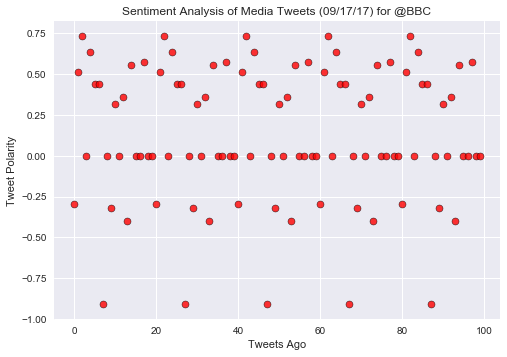

In [20]:
# Create plot
plt.scatter(np.arange(len(sentiments_pd["Compound"])),
            sentiments_pd["Compound"], marker="o", linewidth=0.5, alpha=0.8, edgecolor="black",
            color="red")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()